**This notebook makes a map of ASNs called by or calling to CloudPBX in 1. North America 2. Vancouver. Points representing the locations are coloured by ASN company. Throughout the day, the maps will also include other parameters, such as a value for call quality.**

In [14]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import ipaddress
import geoip2.database
from mpl_toolkits.basemap import Basemap, cm
import matplotlib.cm as cm
%matplotlib inline
from collections import OrderedDict

Load data. It should include the name of the ASN, along with the coordinates of all its IP addresses.

In [11]:
df = pd.read_csv('unique_rtp_pairings.csv')
df2 = pd.read_csv('unique_rtp_pairings_extra.csv')
#df = df.join(df2[['count', 'mean_Qualfun']])

In [12]:
df.head()

,id,date,a_saddr,b_saddr,a_saddr_asn,a_saddr_asorg,a_saddr_as_ip,a_saddr_lat,a_saddr_long,b_saddr_asn,b_saddr_asorg,b_saddr_as_ip,b_saddr_lat,b_saddr_long
0,71483861,2018-03-15,3227975250,41732323,395152,CloudPBX,192.102.254.82,43.6319,-79.3716,5607,Sky UK Limited,2.124.200.227,53.2738,-2.6087
1,70783533,2018-03-09,3227975251,41733976,395152,CloudPBX,192.102.254.83,43.6319,-79.3716,5607,Sky UK Limited,2.124.207.88,53.2738,-2.6087
2,76384583,2018-05-03,1654599250,69076145,395766,CloudPBX,98.159.46.82,40.7432,-75.2242,3356,"Level 3 Parent, LLC",4.30.4.177,32.8072,-117.1649
3,65221709,2018-01-11,3227975251,70715842,395152,CloudPBX,192.102.254.83,43.6319,-79.3716,3356,"Level 3 Parent, LLC",4.55.9.194,37.7510,-97.8220
4,65444938,2018-01-15,3227975250,70715842,395152,CloudPBX,192.102.254.82,43.6319,-79.3716,3356,"Level 3 Parent, LLC",4.55.9.194,37.7510,-97.8220


In [13]:
df2.head()

,Unnamed: 0,a_saddr,b_saddr,a_saddr_asn,a_saddr_asorg,a_saddr_as_ip,a_saddr_lat,a_saddr_long,b_saddr_asn,b_saddr_asorg,b_saddr_as_ip,b_saddr_lat,b_saddr_long,count,bad_count,bad_ratio,mean_Qualfun,mean_b_mos_adapt_mult10,bad_count_lt40
0,0,3227975250,41732323,395152,CloudPBX,192.102.254.82,43.6319,-79.3716,5607,Sky UK Limited,2.124.200.227,53.2738,-2.6087,2,0,0.0,1.610616,45.0,0
1,1,3227975251,41733976,395152,CloudPBX,192.102.254.83,43.6319,-79.3716,5607,Sky UK Limited,2.124.207.88,53.2738,-2.6087,2,0,0.0,10.444028,45.0,0
2,2,1654599250,69076145,395766,CloudPBX,98.159.46.82,40.7432,-75.2242,3356,"Level 3 Parent, LLC",4.30.4.177,32.8072,-117.1649,1,0,0.0,0.000000,45.0,0
3,3,3227975251,70715842,395152,CloudPBX,192.102.254.83,43.6319,-79.3716,3356,"Level 3 Parent, LLC",4.55.9.194,37.751,-97.822,26,0,0.0,0.054872,45.0,0
4,4,3227975250,70715842,395152,CloudPBX,192.102.254.82,43.6319,-79.3716,3356,"Level 3 Parent, LLC",4.55.9.194,37.751,-97.822,20,0,0.0,0.028395,45.0,0


Load coordinates

In [3]:
lata = df['a_saddr_lat']
lona = df['a_saddr_long']
latb = df['b_saddr_lat']
lonb = df['b_saddr_long']
ct = df['count']

Finding unique ASN names - as list

In [4]:
orga = df['a_saddr_asorg']
orgb = df['b_saddr_asorg']
unique_ogsb = orgb.unique()
unique_ogsa = orga.unique()

In [15]:
def make_dictionary_colors(unique_ogsb):
    ''' 1. Makes a list of colours
        2. Assigns a unique colour to a unique ASN
    '''
    cm_times = np.linspace(0, 1, len(unique_ogsb))
    colors = [cm.rainbow(x) for x in cm_times]

    dictionary = {}
    for i in range(len(unique_ogsb)):
        dictionary[unique_ogsb[i]] = colors[i]
        
    return dictionary

def make_map(ll_lat, ll_lon, ur_lat, ur_lon, parallels):
    ''' Plots the basic map using:
    lower left lat
    lower left lon
    upper right lat
    upper right lon
    and intervals for drawing the map parallels
    '''
    
    fig = plt.figure(figsize=(20, 16), edgecolor='w')
    m = Basemap(projection='cyl', resolution='l', llcrnrlat=ll_lat, llcrnrlon=ll_lon, urcrnrlat=ur_lat, urcrnrlon=ur_lon)
    #m = Basemap(projection='cyl', resolution='l')
    m.drawparallels(np.arange(-90.,91.,parallels),labels=[True,False,False,True])
    m.drawmeridians(np.arange(-180.,181.,parallels),labels=[True,False,False,True])
    m.drawcoastlines()
    m.fillcontinents(color='w')
    m.drawstates()
    m.drawcountries()
    m.shadedrelief()
    return fig, m

# Wider Map

In [6]:
ll_lat, ll_lon, ur_lat, ur_lon = 22, -130, 65, -55

KeyError: 57

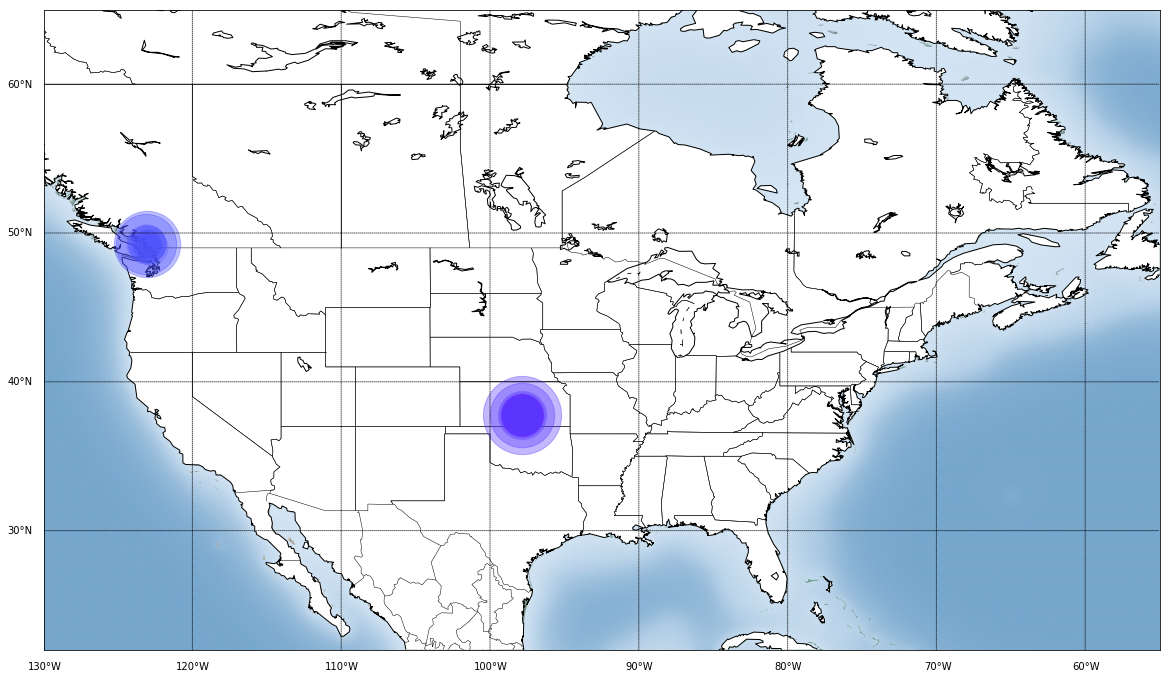

In [7]:
fig, m = make_map(ll_lat, ll_lon, ur_lat, ur_lon, 10)

dictionary = make_dictionary_colors(unique_ogsb)

xa, ya = m(lona, lata)

for i in range(len(latb)):
    orgb_name = orgb[i]
    c = dictionary[orgb_name]
    xb, yb = m(lonb[i], latb[i])
    #m.scatter(xb, yb, marker='o', edgecolors=c, facecolors='none', alpha=0.5, s=ct[i], zorder=2, label=orgb_name)
    m.scatter(xb, yb, marker='o', c=c, alpha=0.2, s=600*np.log(ct[i]), zorder=2, label=orgb_name)
plt.title('ASNs Paired With CloudPBX', fontsize=20)

plt.show()
fig.savefig('img/Map_ASN_NorthAmerica.png', dpi=100, bbox_inches='tight')

# Vancouver

Narrowing down which ASN's have IP's within the map plot domain

In [ ]:
df_van_ip = df[df['a_saddr_asn']==395152]
df_van_asn = df_geo_unique_asn[df_geo_unique_asn['a_saddr_asn']==395152]

In [16]:
# The values for these variables need to be changed for other cities
ll_lat, ll_lon, ur_lat, ur_lon = 48.6, -123.8, 49.8, -122.2

In [17]:
# Find instances that fall only within the plot domain
lat_limits_inds = np.where((latb <= ur_lat) & (latb >= ll_lat))[0]

lon_limits_inds = np.where((lonb <= ur_lon) & (lonb >= ll_lon))[0]

domain_inds = list(set(lat_limits_inds).intersection(set(lon_limits_inds)))

# Find unique companies in the city
orgb_city = []
for i in domain_inds:
    orgb_city.append(orgb[i])

unique_ogsb_city = list(set(orgb_city))

KeyError: 57

NameError: name 'unique_ogsb_city' is not defined

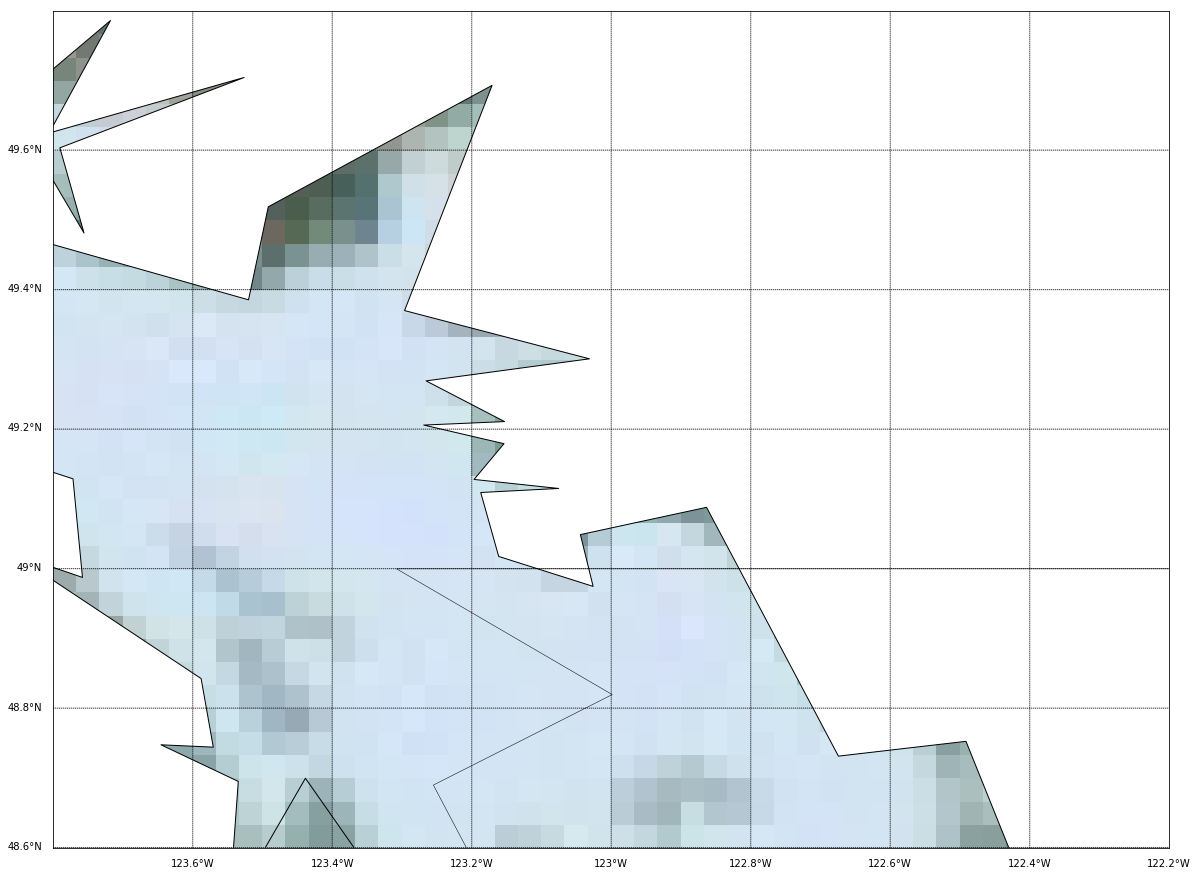

In [18]:
fig, m = make_map(ll_lat, ll_lon, ur_lat, ur_lon, 0.2)

dictionary_city = make_dictionary_colors(unique_ogsb_city)

xa, ya = m(lona, lata)

for i in domain_inds:
    orgb_name = orgb[i]
    c = dictionary_city[orgb_name]
    xb, yb = m(lonb[i], latb[i])
    m.scatter(xb, yb, marker='o', c=c, alpha=1, s=200, zorder=2, label=orgb_name)  

plt.legend(numpoints=1, ncol=3)
plt.title('ASNs Paired With CloudPBX - Vancouver', fontsize=20)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())  

plt.show()
fig.savefig('img/Map_Vancouver_traceroute.png', dpi=100, bbox_inches='tight')